# Fashion_MNIST Classification

In [415]:
!pip install tensorflow-datasets

In [416]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras

In [417]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**Getting to know the data.**

In [418]:
print(f'The size of the training set: {train_images.shape}')
print(f'The size of the training labels: {train_labels.shape}')
print(f'The size of the test set: {test_images.shape}')
print(f'The size of the test labels: {test_labels.shape}')

The size of the training set: (60000, 28, 28)
The size of the training labels: (60000,)
The size of the test set: (10000, 28, 28)
The size of the test labels: (10000,)


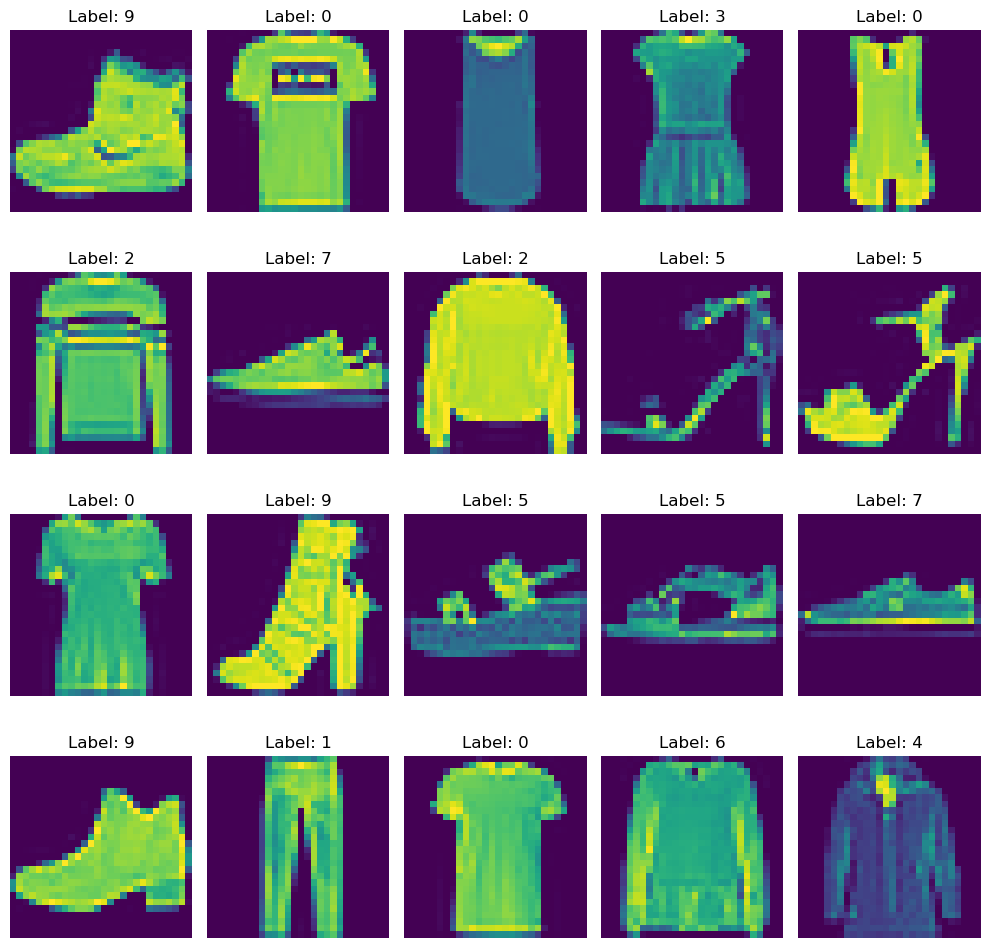

In [419]:
train_images_with_channel = np.expand_dims(train_images, axis=-1)

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img = tf.keras.preprocessing.image.array_to_img(train_images_with_channel[i])
    ax.imshow(img)
    ax.set_title(f'Label: {train_labels[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

The list of labels:
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot


**Data preparation**

In [420]:
# Add channel dimension 
test_images_with_channel = np.expand_dims(test_images, axis=-1)

# Rescale images
train_images_with_channel = train_images_with_channel / 255.0
test_images_with_channel = test_images_with_channel / 255.0

print(f'New training set shape: {train_images_with_channel.shape}')
print(f'New test set shape: {test_images_with_channel.shape}')

# Convert labels to binary class matrices
num_classes = len(np.unique(train_labels))
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

New training set shape: (60000, 28, 28, 1)
New test set shape: (10000, 28, 28, 1)


In [421]:
for i in range(10):
    print(train_labels[i])
train_labels.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


(60000, 10)

**Building the model**

In [422]:
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.layers.Input(input_shape),
        
        keras.layers.Conv2D(84, kernel_size=(3, 3), activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size=(1, 1)),
        
        keras.layers.Conv2D(104, kernel_size=(3, 3), activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(10, activation='linear')
    ]
)

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 26, 26, 84)        840       
                                                                 
 batch_normalization_26 (Bat  (None, 26, 26, 84)       336       
 chNormalization)                                                
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 26, 26, 84)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 24, 24, 104)       78728     
                                                                 
 batch_normalization_27 (Bat  (None, 24, 24, 104)      416       
 chNormalization)                                                
                                                     

In [423]:
batch_size = 128
epochs = 30
checkpoint_filepath = 'best_weights.h5'

early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1)

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(learning_rate=0.001, weight_decay=1e-6), metrics=["accuracy"])

history = model.fit(train_images_with_channel, train_labels, epochs=epochs, callbacks=[early_stop, checkpoint_callback], 
                    validation_split=0.2, batch_size=batch_size)

Epoch 1/35
375/375 [==============================] - ETA: 0s - loss: 0.4619 - accuracy: 0.8366
Epoch 1: val_accuracy improved from -inf to 0.49950, saving model to best_weights.h5
375/375 [==============================] - 60s 158ms/step - loss: 0.4619 - accuracy: 0.8366 - val_loss: 2.5267 - val_accuracy: 0.4995
Epoch 2/35
375/375 [==============================] - ETA: 0s - loss: 0.3025 - accuracy: 0.8887
Epoch 2: val_accuracy improved from 0.49950 to 0.88983, saving model to best_weights.h5
375/375 [==============================] - 59s 157ms/step - loss: 0.3025 - accuracy: 0.8887 - val_loss: 0.3049 - val_accuracy: 0.8898
Epoch 3/35
375/375 [==============================] - ETA: 0s - loss: 0.2537 - accuracy: 0.9065
Epoch 3: val_accuracy did not improve from 0.88983
375/375 [==============================] - 59s 158ms/step - loss: 0.2537 - accuracy: 0.9065 - val_loss: 0.3162 - val_accuracy: 0.8834
Epoch 4/35
375/375 [==============================] - ETA: 0s - loss: 0.2206 - accurac

In [424]:
def plot_learning_curves(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()
    
    
def plot_accuracy_curves(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()


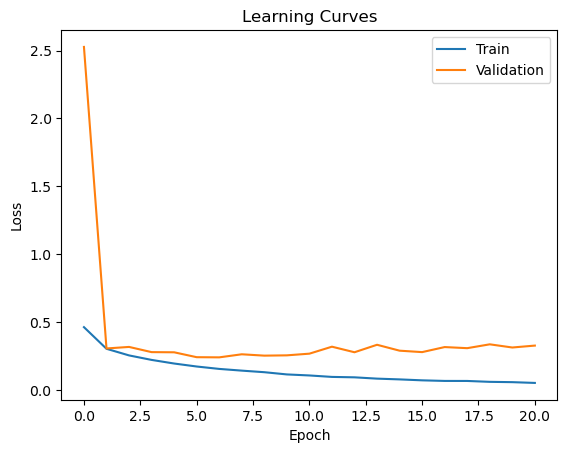

In [425]:
plot_learning_curves(history)

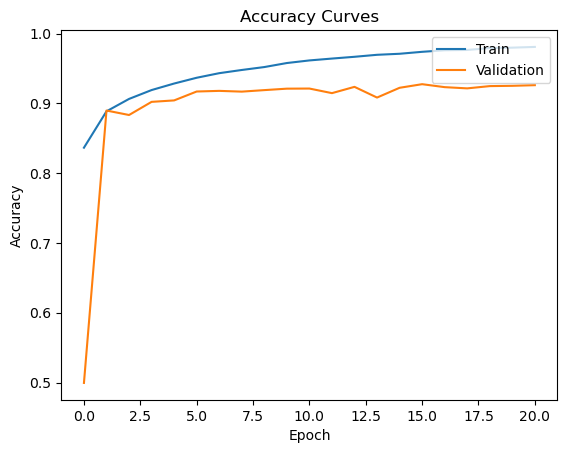

In [426]:
plot_accuracy_curves(history)

There is no sign of overfitting in the learning and accuracy curves.

Let's check if the model generalizes to the new data well.

In [427]:
model.load_weights('best_weights.h5')

test_logits = model.predict(test_images_with_channel)
test_predictions = tf.nn.softmax(test_logits)

loss, accuracy = model.evaluate(test_images_with_channel, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 [==============================] - 5s 14ms/step - loss: 0.2990 - accuracy: 0.9213
Test loss: 0.2990352511405945
Test accuracy: 0.9212999939918518


92% of accuracy is not bad. 

Let's see which examples we missclassify.

In [428]:
def plot_image(i, predictions, true_label, img):
    true_label, img = np.argmax(true_label[i]), img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap='gray')
    
    predicted_label = np.argmax(predictions)

    plt.xlabel(f'Pred: {predicted_label}, {round(100*np.max(predictions), 1)}%, true: {true_label}. {predicted_label == true_label}')

    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')

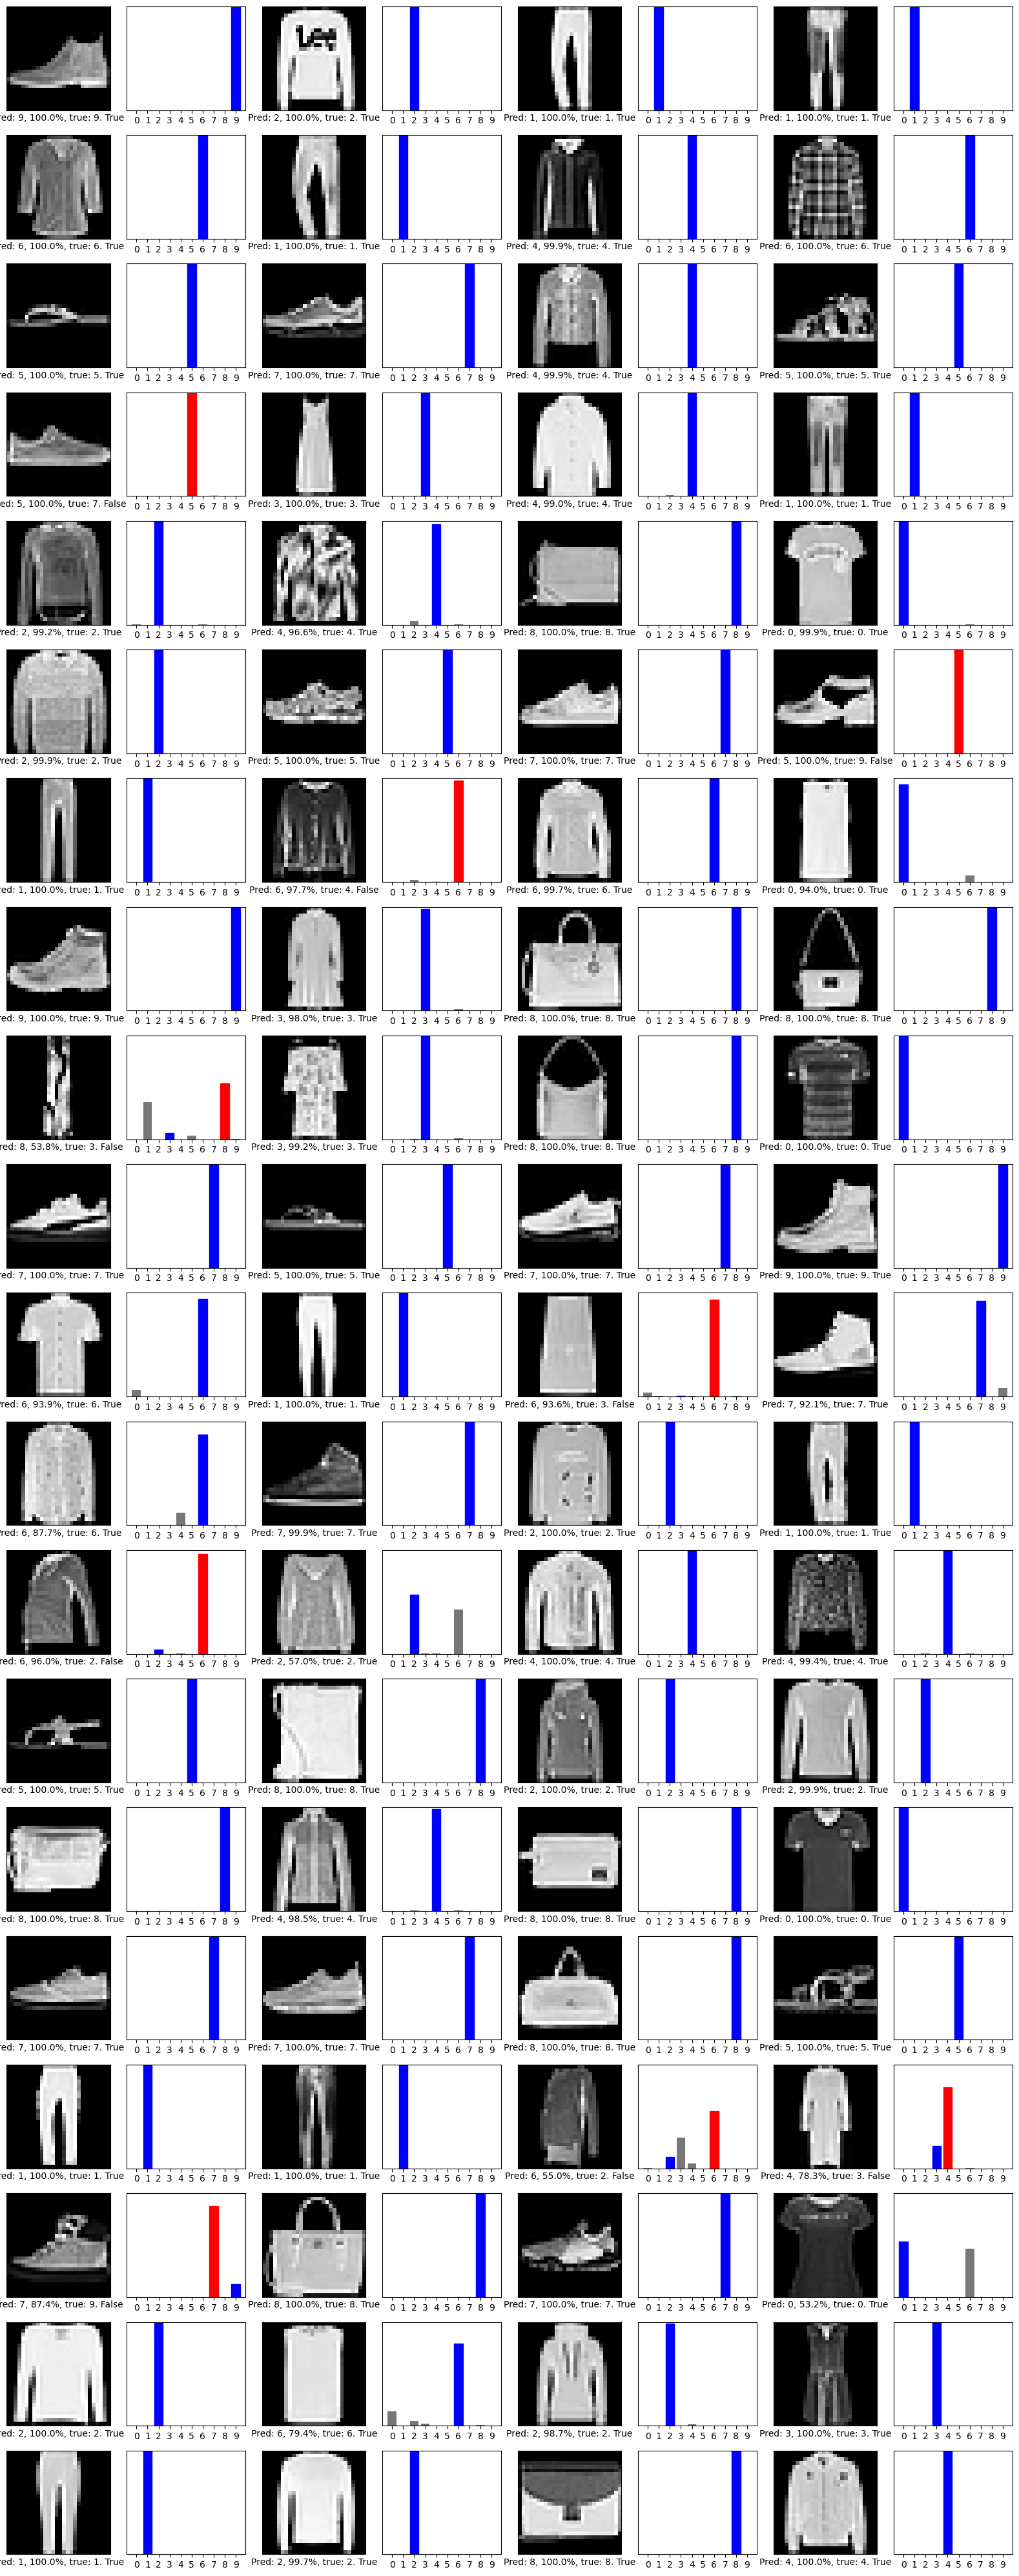

In [429]:
num_rows = 20
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, test_predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, test_predictions[i], test_labels)
plt.tight_layout()
plt.show()